In [34]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os 
print(os.getcwd())

C:\Users\admin


In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
num_cols = []
for column in df.columns:
    if ((df[column].dtype!='object') & (df[column].nunique()>2)):
        num_cols.append(column)
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

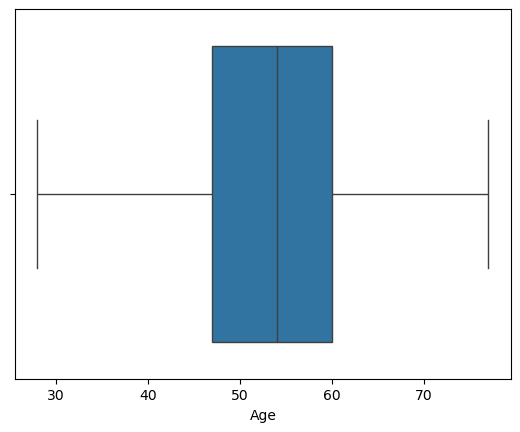

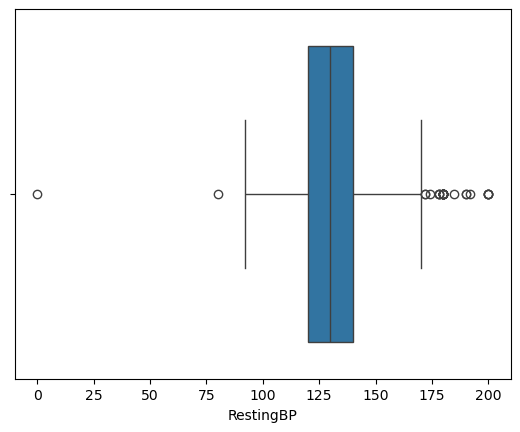

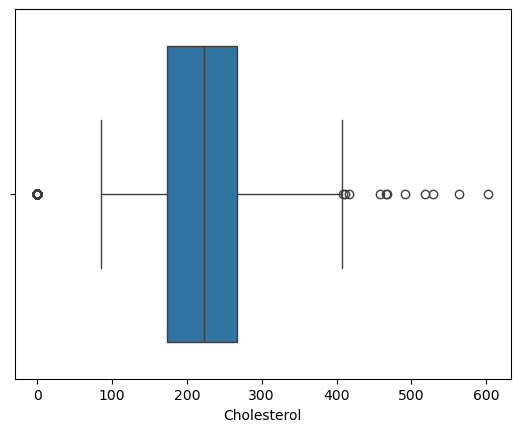

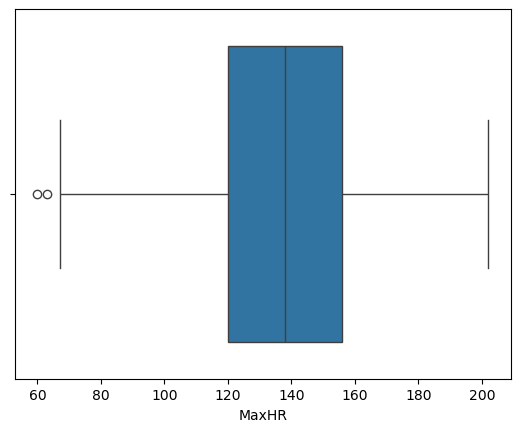

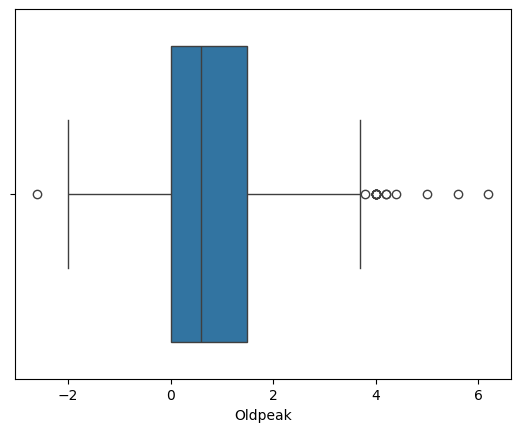

In [8]:
for column in num_cols:
    sns.boxplot(data = df[column], orient='h')
    plt.xlabel(column)
    plt.show()

In [9]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

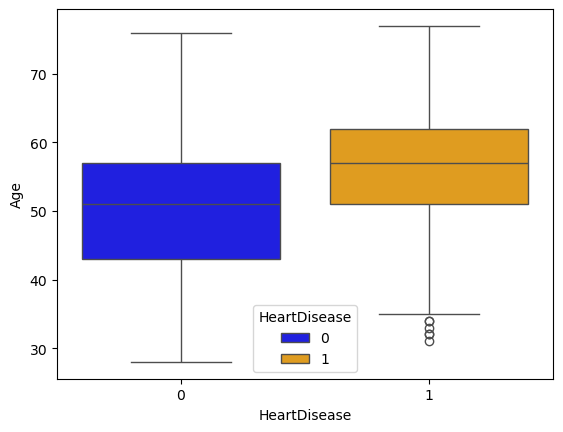

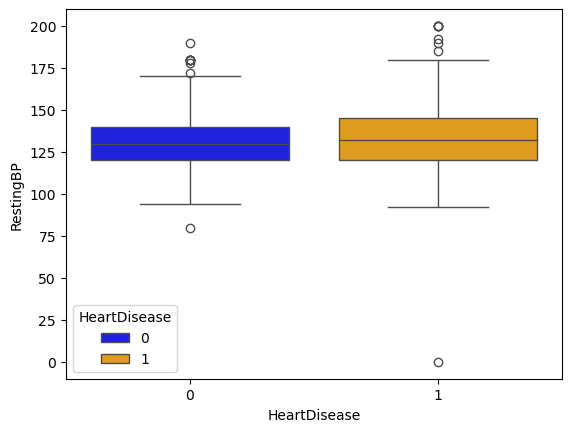

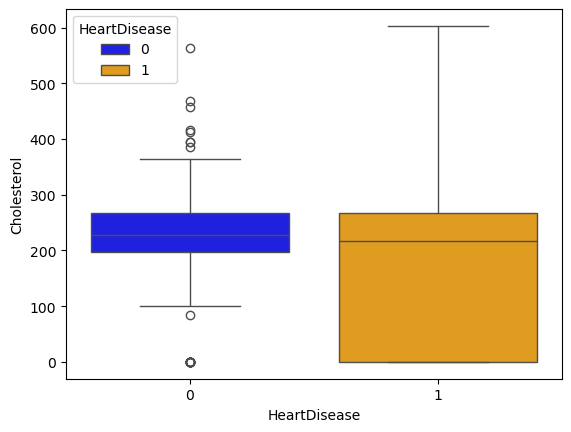

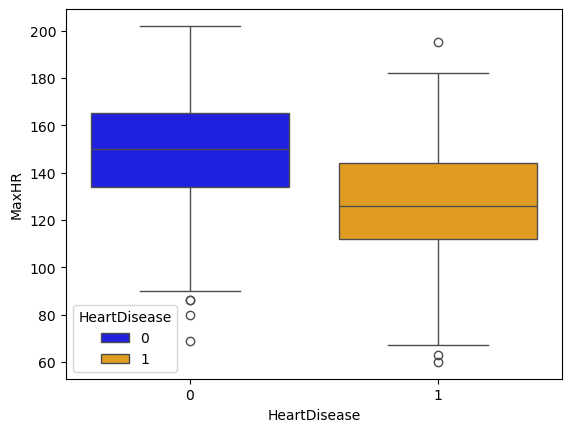

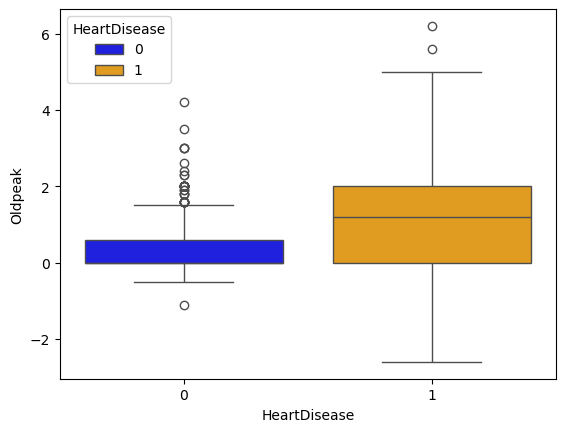

In [11]:
for column in num_cols:
    sns.boxplot(
        data=df,
        y=column,
        x = 'HeartDisease',
        palette={0: "blue", 1: "orange"},
        hue='HeartDisease'# map 0 to blue, 1 to orange
    )
    plt.show()


In [12]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

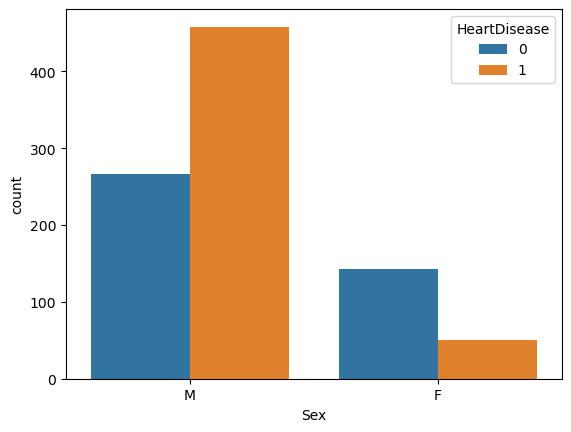

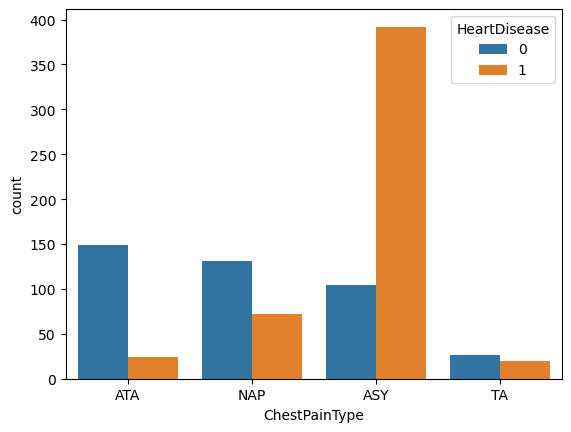

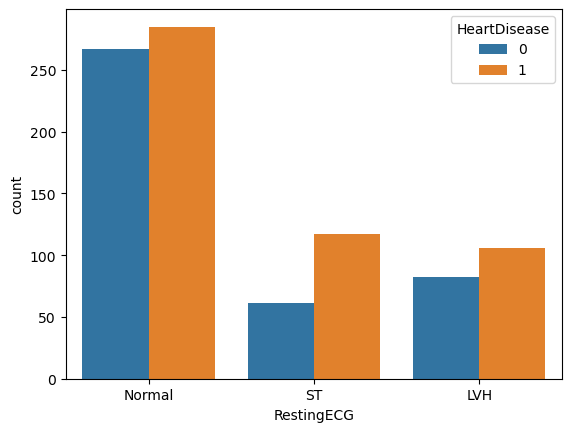

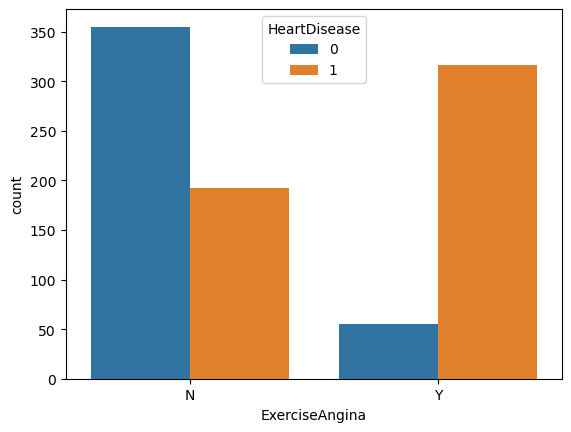

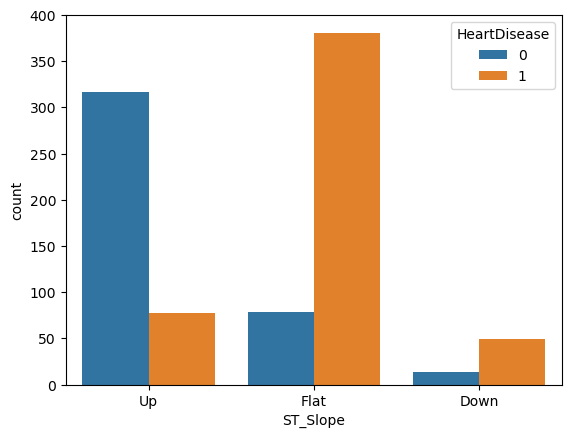

In [13]:
for column in cat_cols:
    sns.countplot(data=df,x=column,hue='HeartDisease')
    plt.show()

<Axes: xlabel='FastingBS', ylabel='count'>

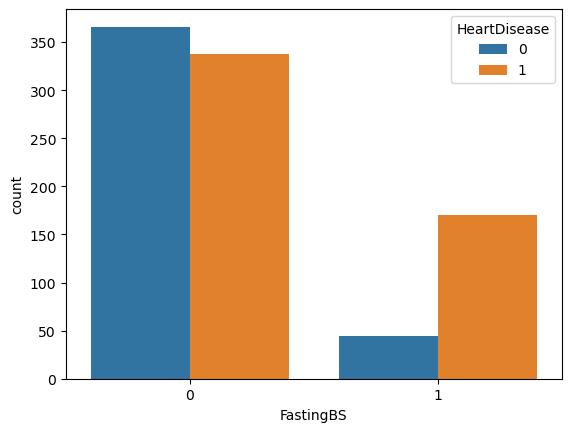

In [14]:
sns.countplot(data=df, x= 'FastingBS', hue='HeartDisease')


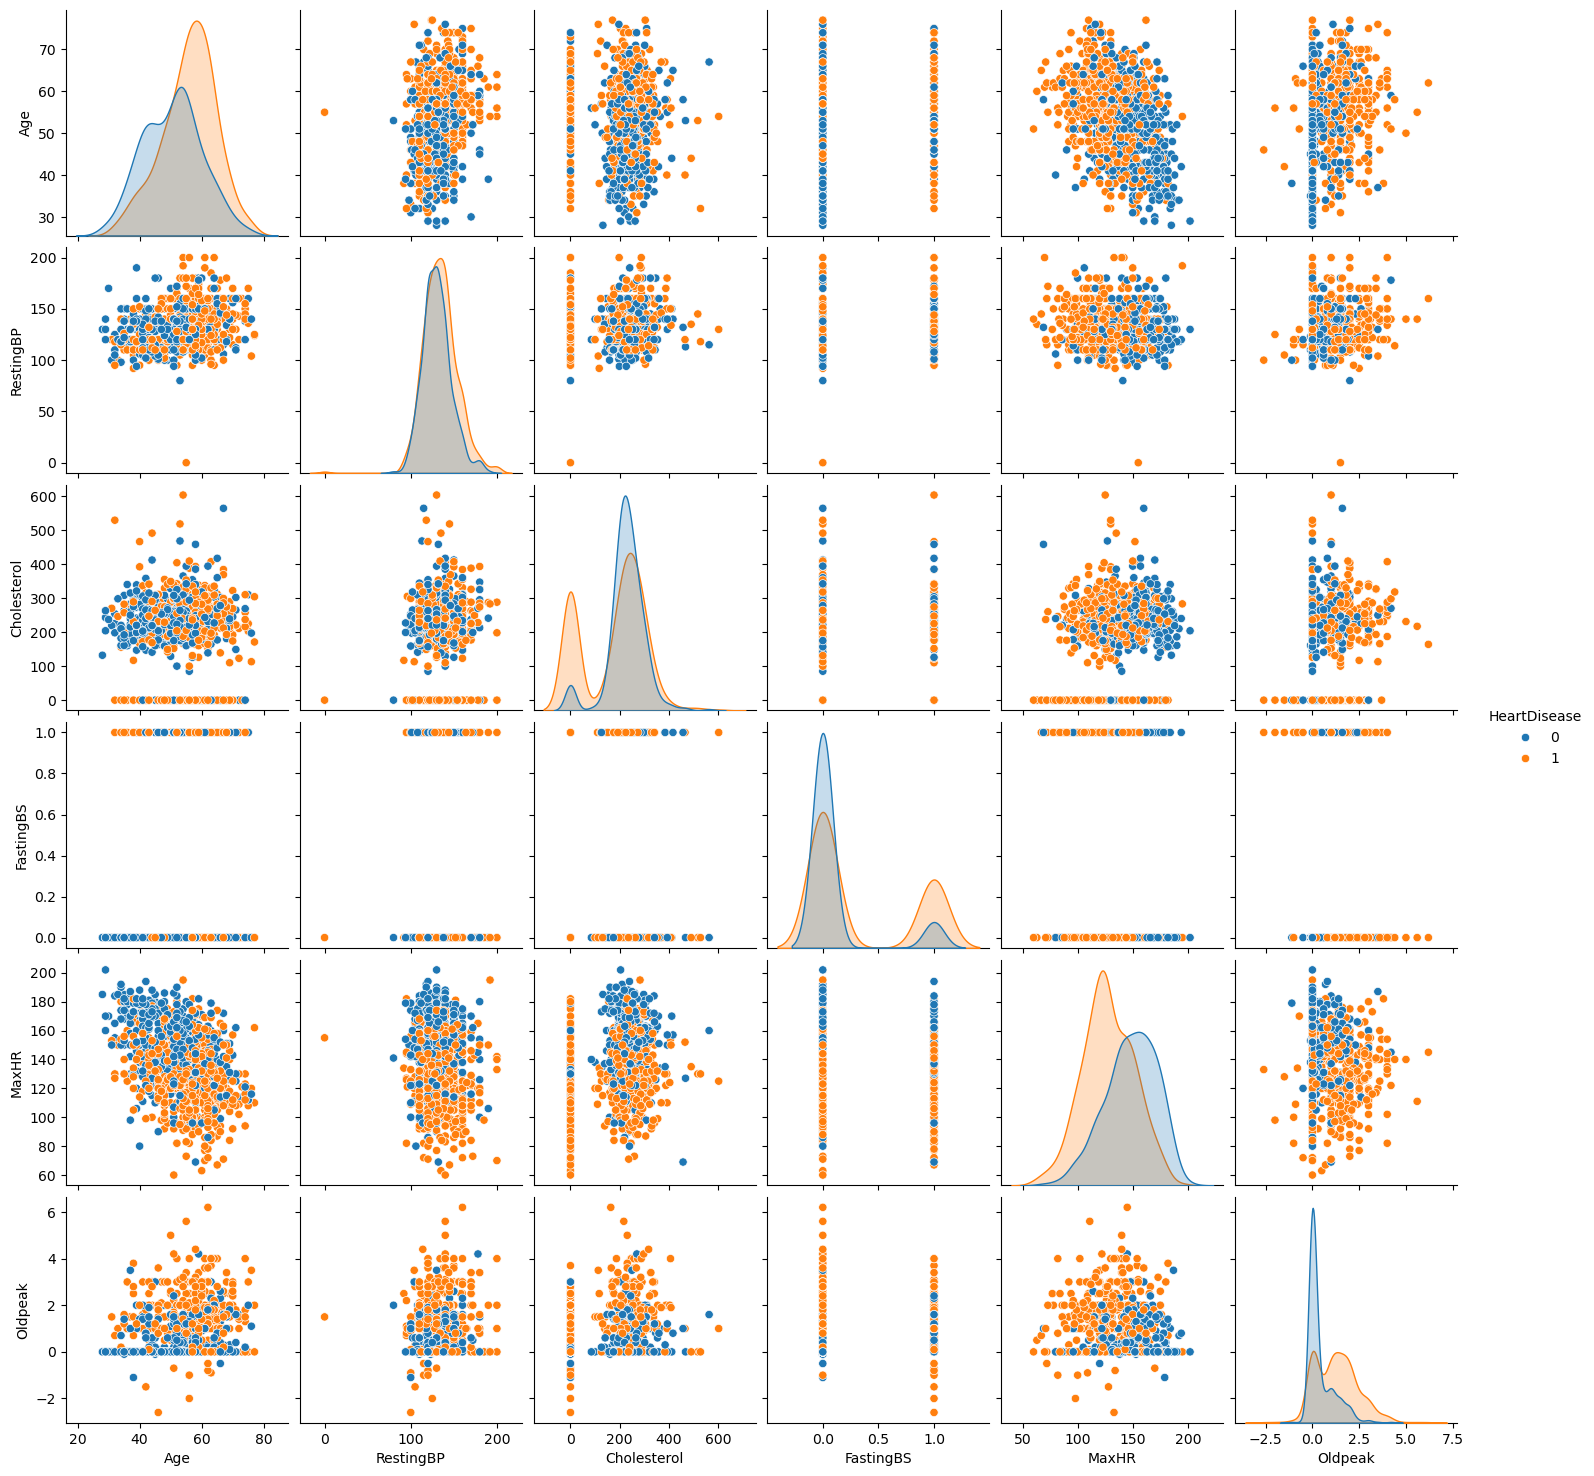

In [15]:
sns.pairplot(data=df,hue='HeartDisease')

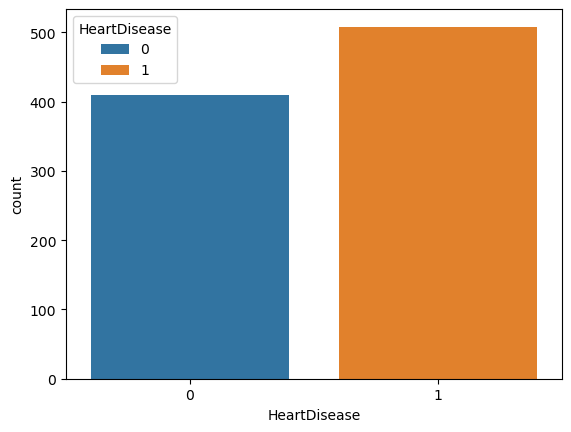

In [19]:
sns.countplot(data=df, x='HeartDisease', hue='HeartDisease')
plt.show()


In [20]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [21]:
encoded_df=pd.get_dummies(df,drop_first=True)
encoded_df


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


<Axes: >

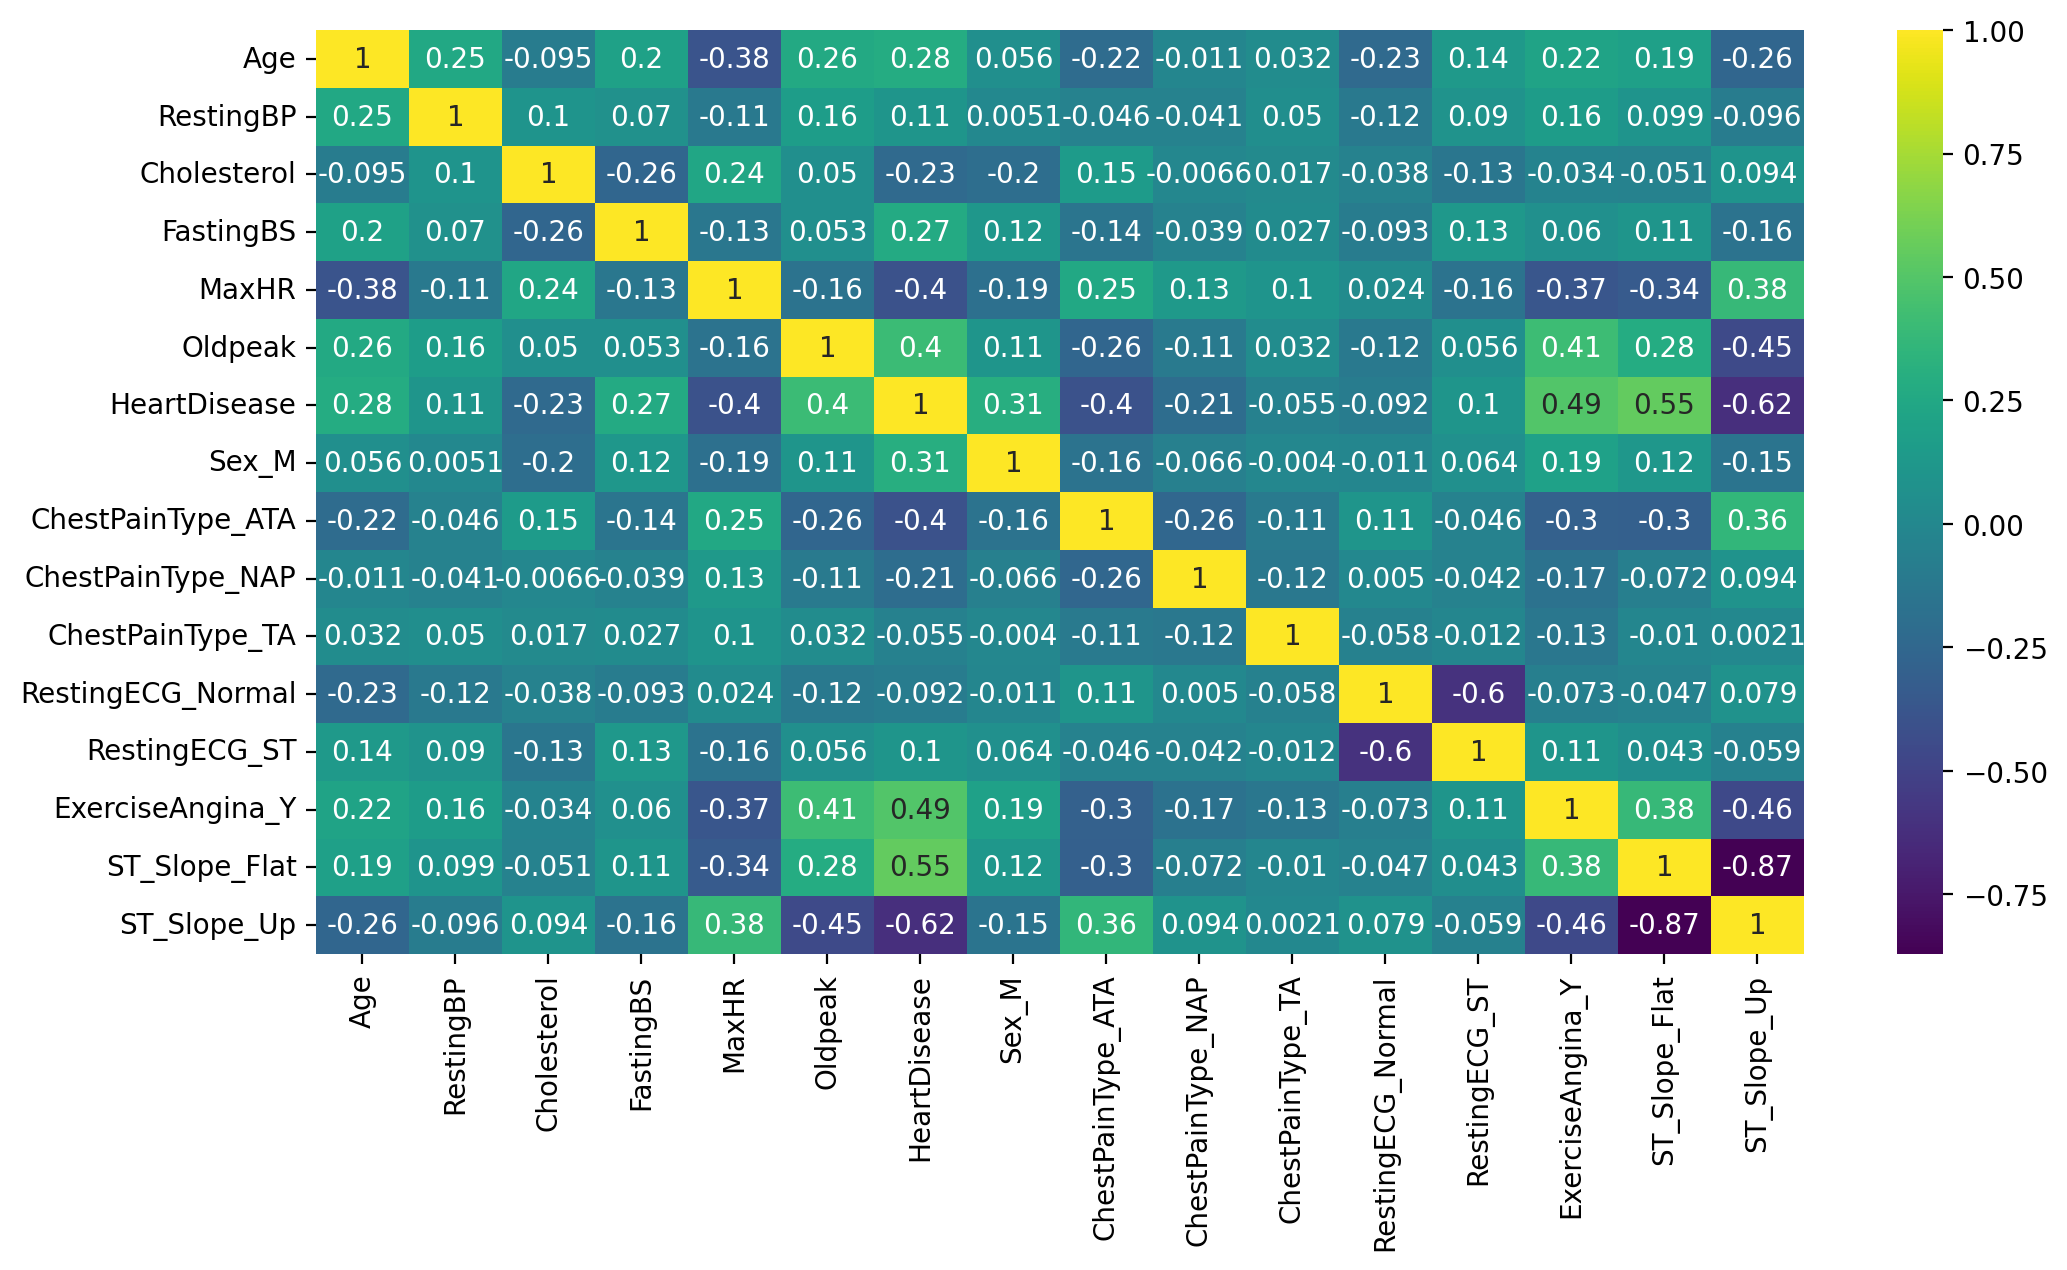

In [23]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(data=encoded_df.corr(), annot=True, cmap='viridis')


In [24]:
encoded_df = encoded_df.drop('ST_Slope_Flat', axis=1)


In [25]:
X=encoded_df.drop('HeartDisease',axis=1)
y=encoded_df['HeartDisease']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 1000, class_weight = 'balanced')
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {'l1_ratio': l1_ratio, 'C': C}

In [36]:
log_grid_model=GridSearchCV(log_model, param_grid, cv = 10)
log_grid_model.fit(scaled_X_train, y_train);


In [40]:
log_grid_model.best_params_


{'C': np.float64(1.0), 'l1_ratio': np.float64(0.0)}

In [41]:
log_preds = log_grid_model.predict(scaled_X_test)


In [43]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test, log_preds))
plot_confusion_matrix(log_grid_model, scaled_X_test, y_test)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        56
           1       0.89      0.82      0.85        82

    accuracy                           0.83       138
   macro avg       0.83      0.84      0.83       138
weighted avg       0.84      0.83      0.83       138



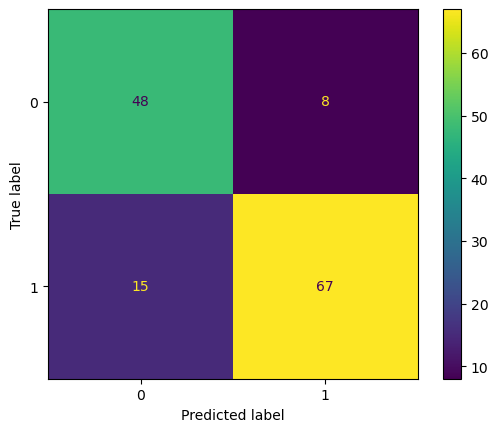

In [44]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Print classification report
print(classification_report(y_test, log_preds))

# Create confusion matrix
cm = confusion_matrix(y_test, log_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [46]:
from sklearn.svm import SVC
svm_model = SVC(class_weight='balanced')
param_grid={'C':[0.001,0.01,0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto']}


In [48]:
svm_grid_model = GridSearchCV(svm_model, param_grid, cv=10)
svm_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [49]:
svm_grid_model.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        56
           1       0.92      0.85      0.89        82

    accuracy                           0.87       138
   macro avg       0.86      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



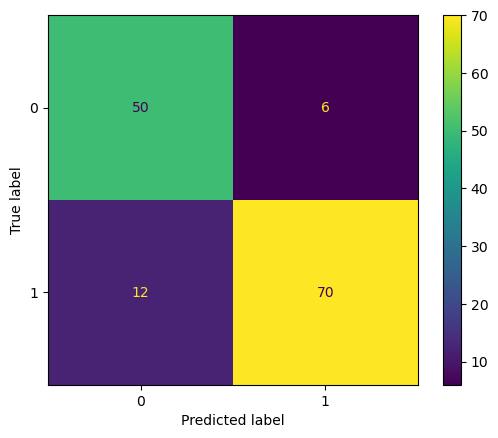

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions
svm_preds = svm_grid_model.predict(scaled_X_test)

# Classification report
print(classification_report(y_test, svm_preds))

# Confusion matrix
cm = confusion_matrix(y_test, svm_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
